In [ ]:
column_to_predict = 'transcriptConsumer'

In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/nlp-projects/inputs/he/clean_1.8.23_19.9.23.xlsx'

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df = pd.read_excel('/content/clean_1.8.23_19.9.23.xlsx')

In [ ]:
import pandas as pd
df = pd.read_excel(drive_path)
df.shape

NameError: name 'drive_path' is not defined

<Axes: ylabel='count'>

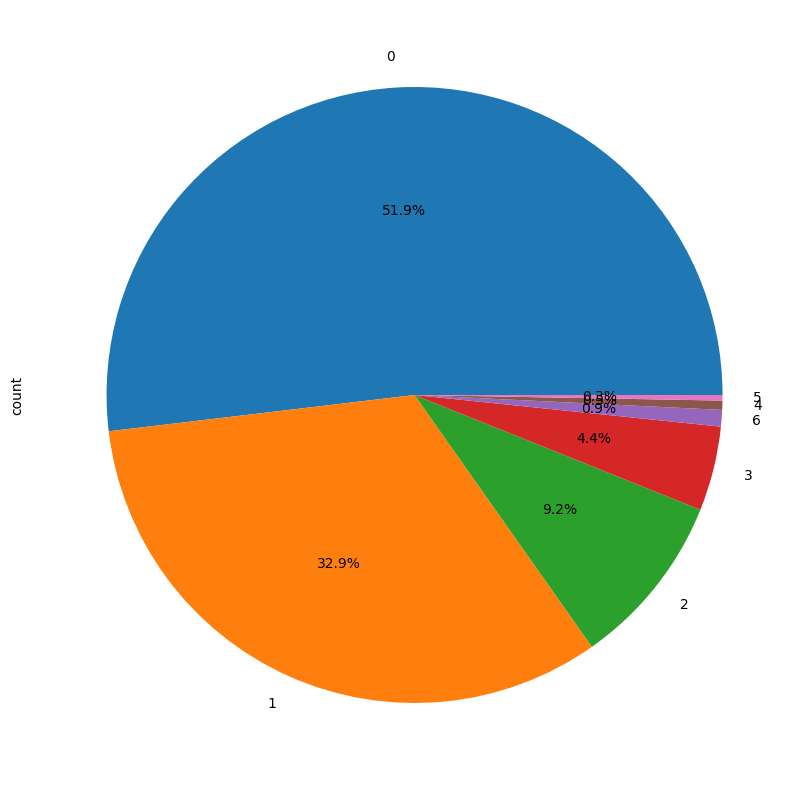

In [ ]:
df['classification'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

# level 1: vector without classification, classification 2

In [ ]:
columns_to_vectorized = ['despair',
       'loneliness', 'emotional overflow', 'self blame', 'anxiety',
       'distrust / confusion', 'new assault / new exposure',
       'level of suicide/ level of risk', 'obligation to report occording law',
       'support for support circuls']

# Encode Non-binary Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode the text_column
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_vectorized])

NUM_LABLES = len(encoded_columns)
NUM_LABLES

# Convert the encoded columns to a DataFrame and concatenate with the original DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_vectorized))
df = pd.concat([df, encoded_df], axis=1).drop(columns_to_vectorized, axis=1)

# Display the updated DataFrame
print(df)

      Unnamed: 0                        conversationId  firstConversation  \
0              0  33c142cb-97cd-416e-91f9-04c5bca79603                  1   
1              1  9942e3a8-7493-4994-b671-5b8f1d1260ff                  0   
2              2  5221a814-ee0f-4c12-979c-d923e3f58070                  0   
3              3  7f2375ee-d421-4ed4-8021-31f8ec0c33b0                  1   
4              4  1aa7057d-2b41-4501-966c-4cf11222d910                  0   
...          ...                                   ...                ...   
1032         497  3092049a-ea24-43f2-ae8a-5ec024ef8027                  1   
1033         498  a60dec99-82ce-46bc-afc5-9b8a9a122a20                  1   
1034         499  f2d75726-36c1-4036-9c05-8a737953b124                  0   
1035         500  31eb61cf-853b-45d8-b63b-b310986d9890                  1   
1036         501  48cd4574-af62-4ffb-9cb4-8ff5b448310f                  0   

                                          transcriptAll  \
0     23:22:22-c

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
count_encoded_lables = len(encoded_df.columns)
count_encoded_lables

22

In [ ]:
df.columns

In [ ]:
vectorized_path = '/content/drive/My Drive/nlp-projects/inputs/he/1.8.23_19.9.23_vectorized.csv'

In [ ]:
df.to_csv(vectorized_path, index=False)

In [ ]:
import pandas as pd

column_to_predict = 'transcriptConsumer'
df = pd.read_csv('/content/1.8.23_19.9.23_vectorized.csv')


In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
!pip install accelerate -U
!pip install torch transformers -U
#!pip install transformers[torch]
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
#model_name = "bert-base-multilingual-cased"
model_name = "xlm-roberta-base"

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, XLMRobertaForSequenceClassification, XLMRobertaTokenizer, EarlyStoppingCallback, IntervalStrategy
"""
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=count_encoded_lables)
tokenizer = BertTokenizer.from_pretrained(model_name)
"""
model = XLMRobertaForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=count_encoded_lables)
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
df[column_to_predict] = df[column_to_predict].astype(str)
texts = df[column_to_predict].values.tolist()

labels = df[encoded_df.columns].values.tolist()

In [ ]:
texts

['היי אני לא יודעת אם לפנות אליכם או לא.\nלפני מספר ימים עברתי משהו לא נעים, ידיד של חברה שלי שהיה אמור להקפיץ אותי לבית, הוא לקח אותי לבית שלו, כל הדרך הבהרתי שאני לא אכנס אליו לבית ושאני לא מעוניינת.\nהגענו למקום הוא רצה שאכנס וטען שרק יאכל משהו ויקח אותי לבית, כל הזמן שהיינו אצלו הוא רצה שאקשיב לו, ניסה לגעת בי, לחבק אותי, אמר לי ללכת לישון ונשכב לידי מבלי שאני רוצה.\nלבסוף כעסתי, דרשתי שלא יתקרב אלי ואחרי זמן ארוך מצאתי דרך לחזור לבית.\nכן',
 'כואב לי בחזה\nכואב לי\nבסדר תודה\nמפוחד נפשית מאד',
 'הייי שנייי ערב טוב \nיום חמישי אנחנו מארגנים הרמת כוסית חגיגית לכבוד השנה החדשה\nניפגש בקאנטה בחוף דלילה (המאנקיז לשעבר) ב-21.9 יום חמישי בשעה 18:00 \nבתוכנית : הרמת כוסית, נישנושים וגם נחשוב ביחד מה אנחנו רוצים שיהיה בפעילויות שלנו בהמשך השנה.\nואת הערב יסגור די-גיי אילוז האלוף במסיבה כיפית אל תוך הסופ״ש\nחחחחחח חושבים שאננ ילך לחרא הזה\nהינה היסטוריה בקצרה עלי\n!!\nזה מתכון לאונס נאנסתי פעם אחת לא שוב\nהידיד סימם אותי אנס אותי לפני שנתיים\nמהתיכון מהפדופיליה בבית ספר הפגיעה הפוסט טראומה 

In [ ]:
from transformers import DataCollatorWithPadding
from sklearn.model_selection import StratifiedShuffleSplit
from datasets import Dataset
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.1)

# Use StratifiedShuffleSplit
"""
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in split.split(texts, labels):
    train_texts, val_texts = np.array(texts)[train_index], np.array(texts)[val_index]
    train_labels, val_labels = labels[train_index], labels[val_index]
"""
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)


In [ ]:
print(train_labels)
print(val_labels)
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})

[[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score

# Define compute_metrics function for multi-label classification
def compute_metrics(p):
    preds = (p.predictions > 0).astype(int)  # Convert logits to binary predictions
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
from transformers import Trainer
import torch

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss


In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy=IntervalStrategy.STEPS,
    eval_steps=50,
    save_steps=50,  # Save model at the same interval as evaluation
    metric_for_best_model = 'accuracy',
    learning_rate=2e-5,  # Lower learning rate
    report_to="tensorboard",
    load_best_model_at_end=True,

)

# Data collator for padding
data_collator = DataCollatorWithPadding(tokenizer)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=0.0)]
)

# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,0.673400,0.671167,0.000000,0.637782,0.676231,0.668269
100,0.559500,0.516330,0.509615,0.883030,0.856137,0.914423
150,0.389100,0.339840,0.625000,0.887464,0.856527,0.923077
200,0.302000,0.271608,0.625000,0.887464,0.856527,0.923077
250,0.260500,0.236423,0.625000,0.887464,0.856527,0.923077
300,0.250000,0.214307,0.557692,0.900795,0.881763,0.925000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

TrainOutput(global_step=300, training_loss=0.43664730151494346, metrics={'train_runtime': 784.2926, 'train_samples_per_second': 11.896, 'train_steps_per_second': 0.752, 'total_flos': 1248686146406400.0, 'train_loss': 0.43664730151494346, 'epoch': 5.084745762711864})

In [ ]:
# Evaluate the best model on the validation dataset
evaluation_results = trainer.evaluate()

accuracy = format(evaluation_results['eval_accuracy'],".2f")
print(accuracy)

0.62


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model_path = "text-to-vector-model-consumer-en"
model_path = '/content/drive/My Drive/nlp-projects/models/text-to-vector/he/{model_name}-{accuracy}'


In [ ]:
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/My Drive/nlp-projects/models/text-to-vector/he/{model_name}-{accuracy}/tokenizer_config.json',
 '/content/drive/My Drive/nlp-projects/models/text-to-vector/he/{model_name}-{accuracy}/special_tokens_map.json',
 '/content/drive/My Drive/nlp-projects/models/text-to-vector/he/{model_name}-{accuracy}/sentencepiece.bpe.model',
 '/content/drive/My Drive/nlp-projects/models/text-to-vector/he/{model_name}-{accuracy}/added_tokens.json')

In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.eval()

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768,

In [ ]:

def prepare_input(text):
    encoding = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    return encoding

def get_sentiment_vector(text, threshold=0.5):
    logits = predict_sentiments(model, text)
    binary_vector = get_binary_vector(logits, threshold)
    return binary_vector.numpy().flatten()


def predict_sentiments(model, text):
    inputs = prepare_input(text)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    return logits

def get_sentiment_vector(text, threshold=0.5):
    logits = predict_sentiments(model, text)
    binary_vector = get_binary_vector(logits, threshold)
    return binary_vector.numpy().flatten()

def get_binary_vector(logits, threshold=0.5):
    # Apply sigmoid to get probabilities
    probs = torch.sigmoid(logits)
    # Convert probabilities to binary vector based on the threshold
    binary_vector = (probs > threshold).int()
    return binary_vector


In [ ]:
text = """
היי אני לא יודעת אם לפנות אליכם או לא. לפני מספר ימים עברתי משהו לא נעים, ידיד של חברה שלי שהיה אמור להקפיץ אותי לבית, הוא לקח אותי לבית שלו, כל הדרך הבהרתי שאני לא אכנס אליו לבית ושאני לא מעוניינת. הגענו למקום הוא רצה שאכנס וטען שרק יאכל משהו ויקח אותי לבית, כל הזמן שהיינו אצלו הוא רצה שאקשיב לו, ניסה לגעת בי, לחבק אותי, אמר לי ללכת לישון ונשכב לידי מבלי שאני רוצה. לבסוף כעסתי, דרשתי שלא יתקרב אלי ואחרי זמן ארוך מצאתי דרך לחזור לבית. כן"""
binary_vector = get_sentiment_vector(text)
print(binary_vector)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)